In [12]:
xmin = -1.5
ymin = -1.0
xmax = 0.5
ymax = 1.0
resolution = 300
xstep = (xmax - xmin) / resolution
ystep = (ymax - ymin) / resolution
xs = [(xmin + (xmax - xmin) * i / resolution) for i in range(resolution)]
ys = [(ymin + (ymax - ymin) * i / resolution) for i in range(resolution)]

In [13]:
def mandel1(position, limit=50):
    value = position    
    while abs(value) < 2:
        limit -= 1        
        value = value**2 + position        
        if limit < 0:
            return 0        
    return limit

In [14]:
data1 = [[mandel1(complex(x, y)) for x in xs] for y in ys]

## Many Mandelbrots

Let's compare our naive python implementation which used a list comprehension, taking 662ms, with the following:

In [15]:
%%timeit
data2 = []
for y in ys:
    row = []
    for x in xs:
        row.append(mandel1(complex(x, y)))
    data2.append(row)

583 ms ± 17.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
data2 = []
for y in ys:
    row = []
    for x in xs:
        row.append(mandel1(complex(x, y)))
    data2.append(row)

Interestingly, not much difference. I would have expected this to be slower, due to the normally high cost of **appending** to data.

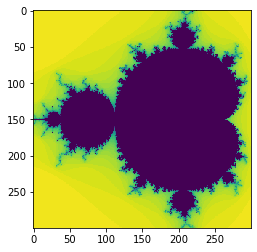

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(data2, interpolation='none')

We ought to be checking if these results are the same by comparing the values in a test, rather than re-plotting. This is cumbersome in pure Python, but easy with NumPy, so we'll do this later.

Let's try a pre-allocated data structure:

In [18]:
data3 = [[0 for i in range(resolution)] for j in range(resolution)]

In [19]:
%%timeit
for j, y in enumerate(ys):
    for i, x in enumerate(xs):
        data3[j][i] = mandel1(complex(x, y))

618 ms ± 30.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
for j, y in enumerate(ys):
    for i, x in enumerate(xs):
        data3[j][i] = mandel1(complex(x, y))

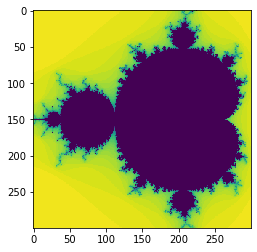

In [21]:
plt.imshow(data3, interpolation='none')

Nope, no gain there. 

Let's try using functional programming approaches:

In [22]:
%%timeit
data4 = []
for y in ys:
    bind_mandel = lambda x: mandel1(complex(x, y))
    data4.append(list(map(bind_mandel, xs)))

635 ms ± 45.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
data4 = []
for y in ys:
    bind_mandel = lambda x: mandel1(complex(x, y))
    data4.append(list(map(bind_mandel, xs)))

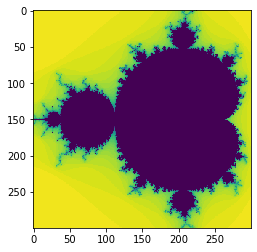

In [24]:
plt.imshow(data4, interpolation='none')

That was a tiny bit slower.

So, what do we learn from this? Our mental image of what code should be faster or slower is often wrong, or doesn't make much difference. The only way to really improve code performance is empirically, through measurements.